# EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
directorio = r"C:\Users\DataScience\ONLINE_DS_THEBRIDGE_DaniCastillo\ML_LEAD SCORING\01_src\01_data_sample\TRABAJO"


Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
# Crear la ruta correctamente
ruta_num = os.path.join(directorio, nombre_num)
ruta_cat = os.path.join(directorio, nombre_cat)

# Cargar el archivo pickle
num = pd.read_pickle(ruta_num)
cat = pd.read_pickle(ruta_cat)

print("Archivo cargado correctamente.")

Archivo cargado correctamente.


In [5]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6052 entries, 660737 to 579533
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   compra           6052 non-null   int64  
 1   visitas_total    6052 non-null   Int64  
 2   tiempo_en_site   6052 non-null   int64  
 3   paginas_vistas   6052 non-null   float64
 4   score_actividad  6052 non-null   float64
 5   score_perfil     6052 non-null   float64
dtypes: Int64(1), float64(3), int64(2)
memory usage: 336.9 KB


In [6]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6052 entries, 660737 to 579533
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   origen                 6052 non-null   object
 1   fuente                 6052 non-null   object
 2   no_enviar_email        6052 non-null   object
 3   no_llamar              6052 non-null   object
 4   ult_actividad          6052 non-null   object
 5   ambito                 6052 non-null   object
 6   ocupacion              6052 non-null   object
 7   conociste_google       6052 non-null   object
 8   conociste_periodico    6052 non-null   object
 9   conociste_facebook     6052 non-null   object
 10  conociste_referencias  6052 non-null   object
 11  descarga_lm            6052 non-null   object
dtypes: object(12)
memory usage: 614.7+ KB


## EDA CATEGÓRICAS

### Análisis estadístico

In [7]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [8]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
25,ambito,Healthcare Management,0.021315
28,ambito,International Business,0.022141
30,ambito,Media and Advertising,0.026933
35,ambito,Travel and Tourism,0.026933
22,ambito,"Banking, Investment And Insurance",0.043457
34,ambito,Supply Chain Management,0.046100
27,ambito,IT Projects Management,0.047422
23,ambito,Business Administration,0.052875
31,ambito,OTROS,0.063781
32,ambito,Operations Management,0.064607


In [ ]:
# Eliminar las variables de como nos conociste. No tiene sentido y tienen valores muy bajos.
# Eliminar respuesta variable de no_enviar_email=yes, en contexto de negocio si no quiere que enviemosemail no poemoscontactar con ellos
# Eliminar  respuesta variable de no_llamar=otros,en contexto de negocio si no quiere que llamemod no poemos contactar con ellos  como se nos queda en constante eliminamos tb lavariable
# Eliminar respuesta  de la variable de ult_actividad Email Bounced, si nos da correo falso no nos interesa pasarlo a estudio de lead

In [9]:
cat = cat.loc [(cat.ult_actividad != "Email Bounced") ] \
    .drop (columns = ["conociste_facebook","conociste_google","conociste_periodico","conociste_referencias","no_enviar_email","no_llamar"])


In [10]:
cat.shape

(5836, 6)

In [11]:
num.shape

(6052, 6)

In [12]:
# tenemos que igualar el numero de registros en num y cat
# igualamos los indices de num al rectificado de cat
num =num [num.index.isin(cat.index)]

In [13]:
num.shape

(5836, 6)

### Análisis gráfico

In [14]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

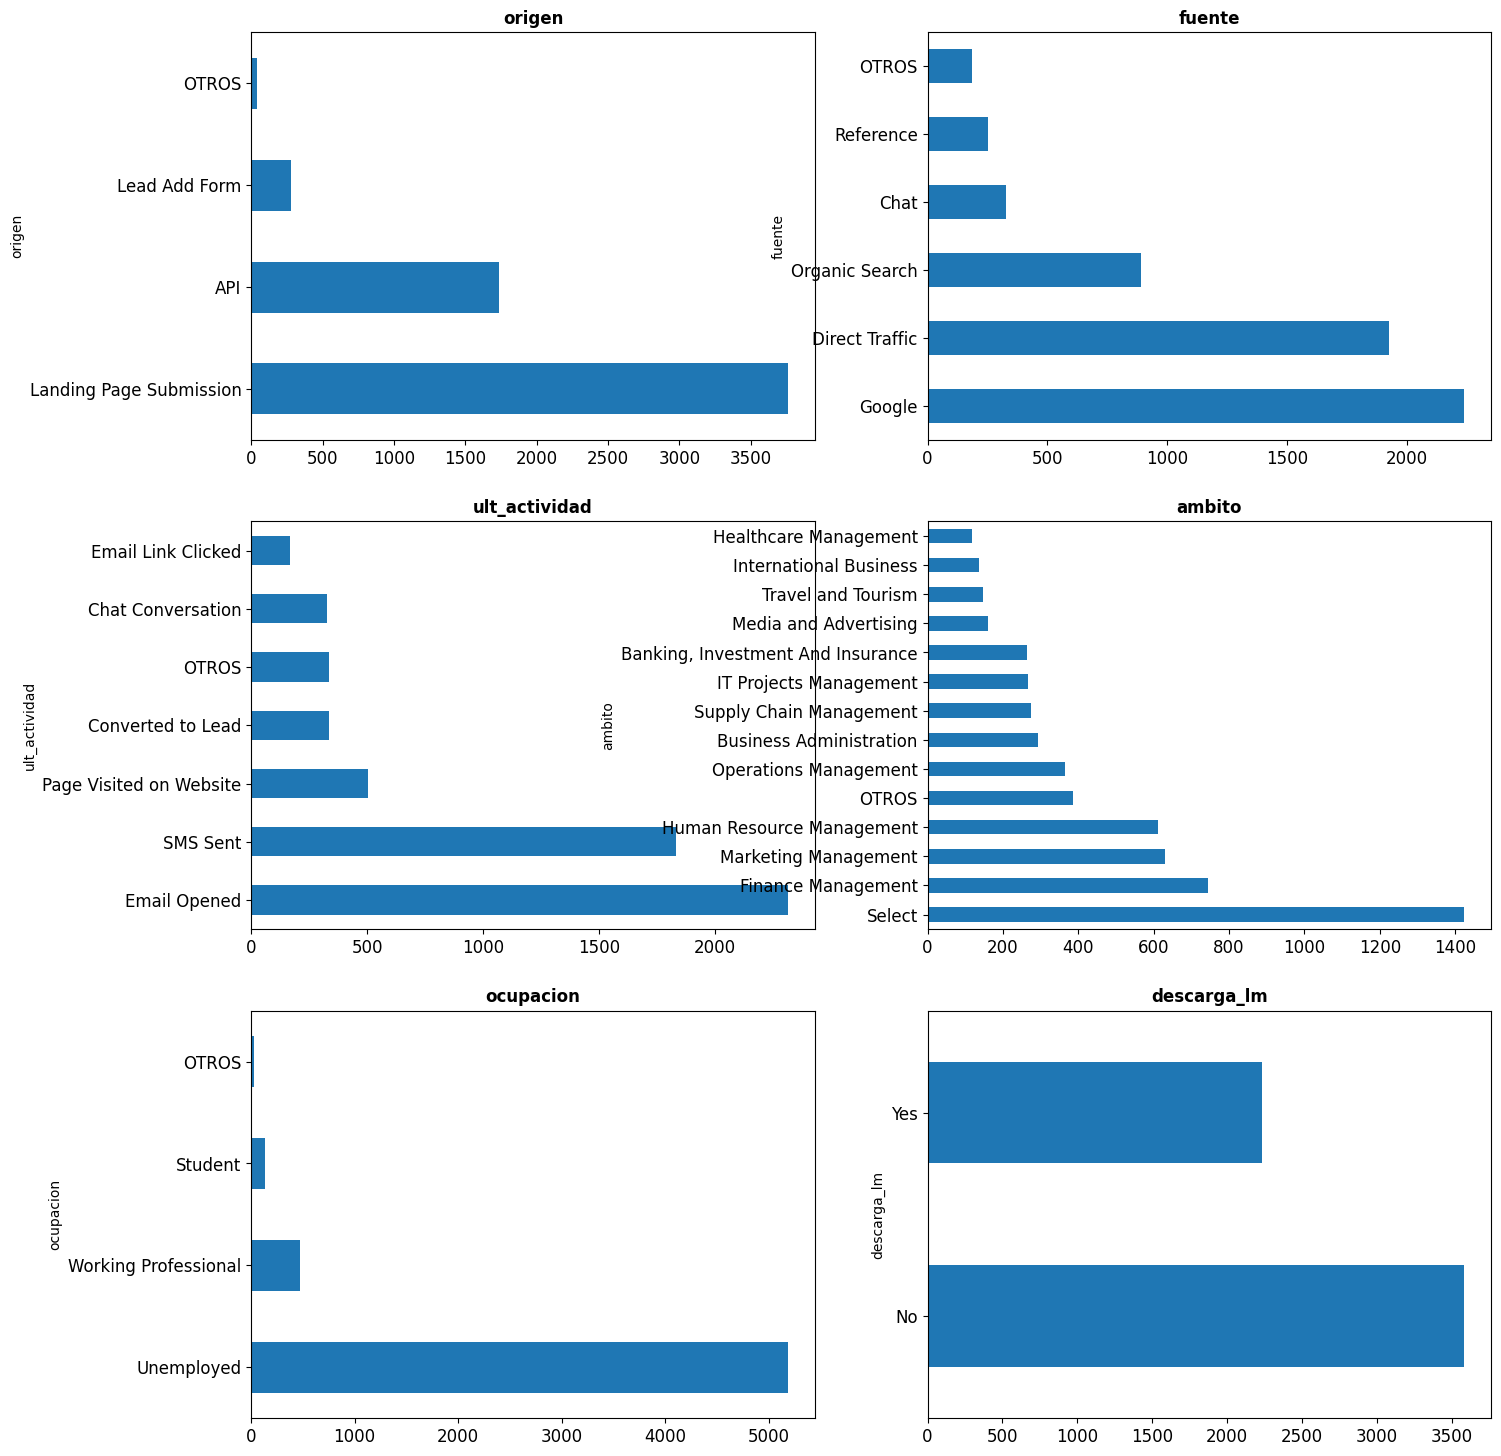

In [13]:
graficos_eda_categoricos(cat)

## EDA NUMÉRICAS

### Análisis estadístico

In [15]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [16]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,5836.0,0.40096,0.0,0.490135,0.0,0.0,0.0,1.0,1.0
visitas_total,5836.0,4.14719,3.0,3.639085,0.0,2.0,3.0,5.0,50.0
tiempo_en_site,5836.0,594.052776,361.0,550.397215,0.0,129.75,361.0,1069.0,2253.0
paginas_vistas,5836.0,2.865463,2.5,1.931911,0.0,2.0,2.5,4.0,20.0
score_actividad,5836.0,14.047978,14.0,0.964899,8.0,14.0,14.0,14.0,18.0
score_perfil,5836.0,16.30843,16.0,1.440438,11.0,16.0,16.0,17.0,20.0


### Análisis gráfico

In [17]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

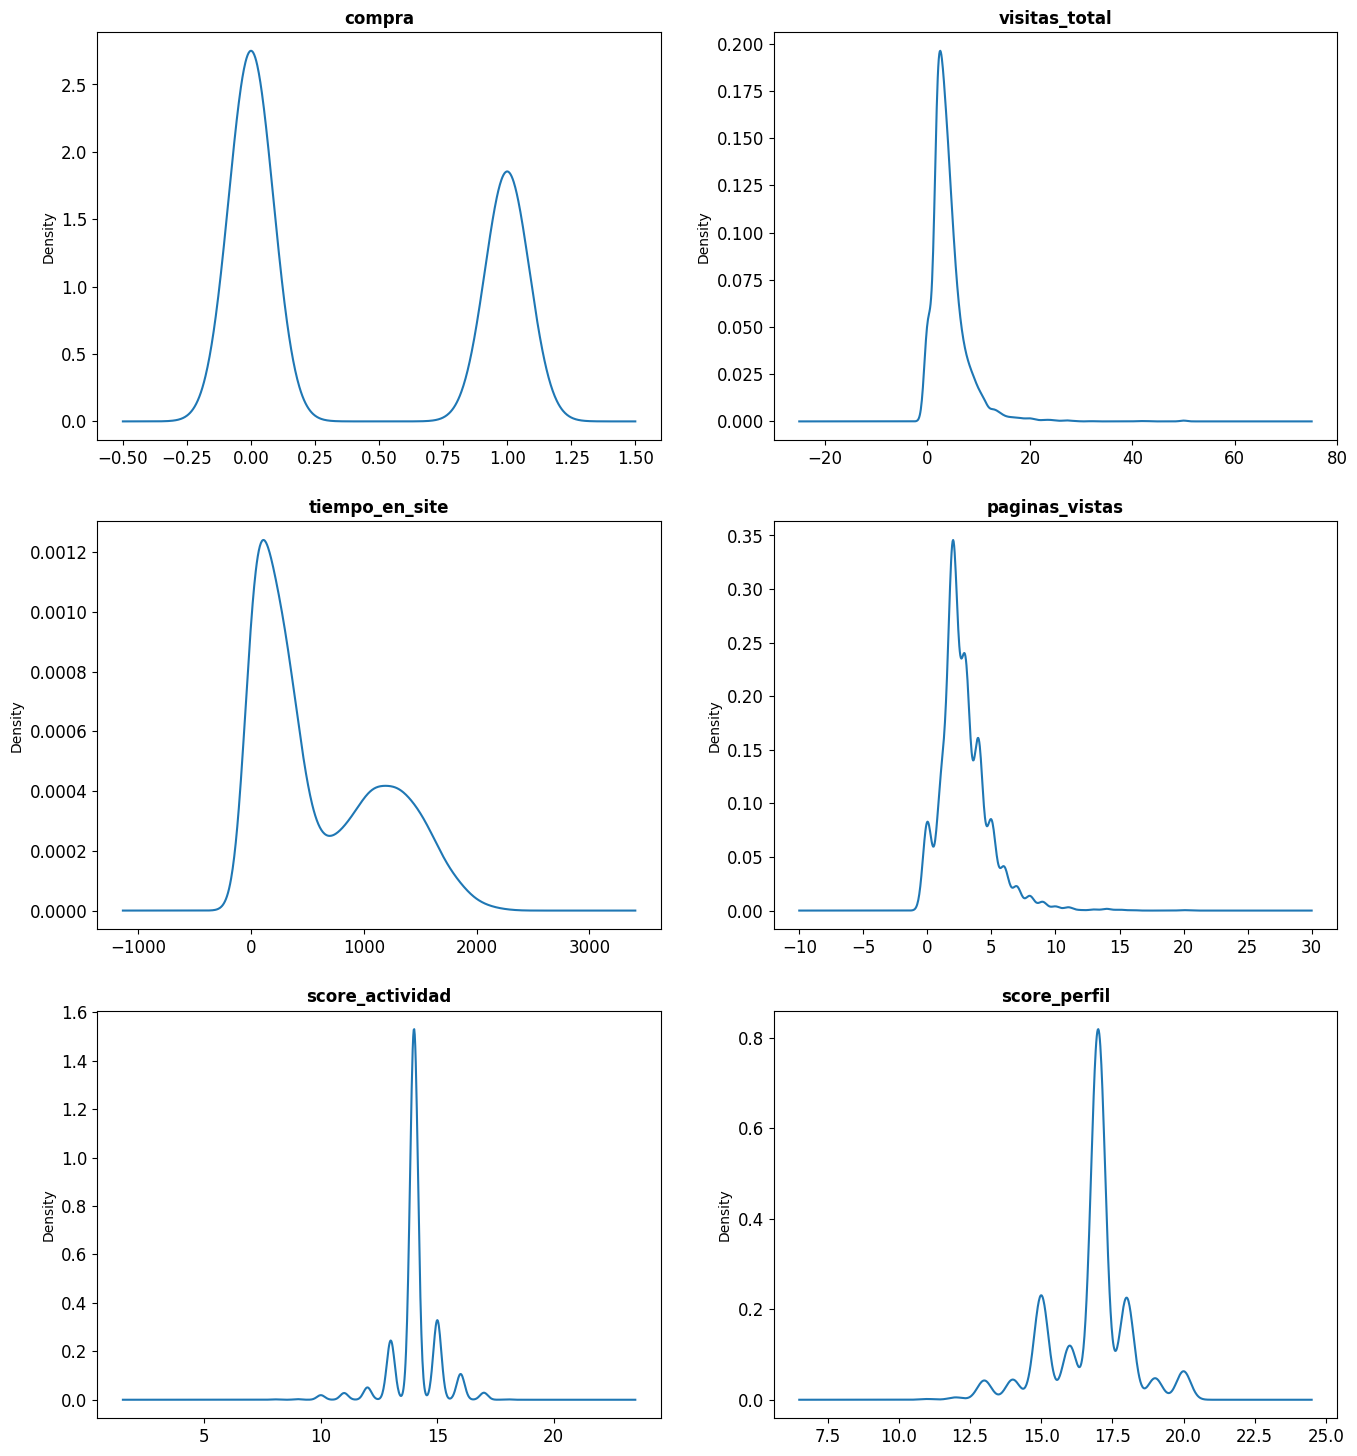

In [17]:
graficos_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [18]:
# Definir el directorio donde se guardarán los archivos
directorio = r"C:\Users\DataScience\ONLINE_DS_THEBRIDGE_DaniCastillo\ML_LEAD SCORING\01_src\01_data_sample\TRABAJO"

# Rutas de los archivos 
ruta_cat = os.path.join(directorio, f"cat_resultado_eda.pickle")
ruta_num = os.path.join(directorio, f"num_resultado_eda.pickle")

In [19]:
# Guardar los DataFrames en formato pickle
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)

print("Archivos guardados con éxito:")

Archivos guardados con éxito:
